**Nama Anggota Kelompok:**
*   Triya Maulana Setya Putra
*   Ahmad Sholihin

**Pembelajaran: Machine Learning**

Studi Kasus: **Indeks Standar Pencemaran Udara (ISPU) Bulan Januari - Oktober Tahun 2021**

Metode Klasifikasi: **Navie Bayes**

Sumber: **Open Data Jakarta**

(Url Link: https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021)

**Import the Libraries**

In [ ]:
# for basic mathematics operation 
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# to inactivated warnings
import warnings 
warnings.filterwarnings('ignore')

**Exploratory Data Analysis and Pre-Processing**

Reading the Dataset

In [ ]:
# importing the dataset
df=pd.read_csv("/content/ISPU (Jan-Oct 2021).csv")
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
753,2021-10-27,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,76.0,NaN,11.0,32.0,17.0,76,PM25,SEDANG
754,2021-10-28,DKI5 (Kebon Jeruk) Jakarta Barat,51.0,77.0,NaN,16.0,29.0,27.0,77,PM25,SEDANG
755,2021-10-29,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,70.0,NaN,18.0,23.0,33.0,70,PM25,SEDANG
756,2021-10-30,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,74.0,NaN,12.0,30.0,24.0,74,PM25,SEDANG


In [ ]:
# deleting tanggal, max, and critical column
df=df.drop(["tanggal","max","critical"],axis=1)

In [ ]:
# showing the dataframe
df

,stasiun,pm10,pm25,so2,co,o3,no2,categori
0,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,SEDANG
1,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,BAIK
2,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,SEDANG
3,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,BAIK
4,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,SEDANG
...,...,...,...,...,...,...,...,...
753,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,76.0,NaN,11.0,32.0,17.0,SEDANG
754,DKI5 (Kebon Jeruk) Jakarta Barat,51.0,77.0,NaN,16.0,29.0,27.0,SEDANG
755,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,70.0,NaN,18.0,23.0,33.0,SEDANG
756,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,74.0,NaN,12.0,30.0,24.0,SEDANG


In [ ]:
# showing a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stasiun   758 non-null    object 
 1   pm10      731 non-null    float64
 2   pm25      688 non-null    float64
 3   so2       687 non-null    float64
 4   co        757 non-null    float64
 5   o3        755 non-null    float64
 6   no2       746 non-null    float64
 7   categori  758 non-null    object 
dtypes: float64(6), object(2)
memory usage: 47.5+ KB


In [ ]:
# checking if there is any NULL data
df.isna().sum()

stasiun      0
pm10        27
pm25        70
so2         71
co           1
o3           3
no2         12
categori     0
dtype: int64

In [ ]:
#fill NA/NaN values

df[["pm25","pm10","so2","co","o3","no2"]]=df[["pm25","pm10","so2","co","o3","no2"]].fillna(df[["pm25","pm10","so2","co","o3","no2"]].mean())

In [ ]:
# checking is NA/NaN values filled already
df.isna().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

Data Visualization

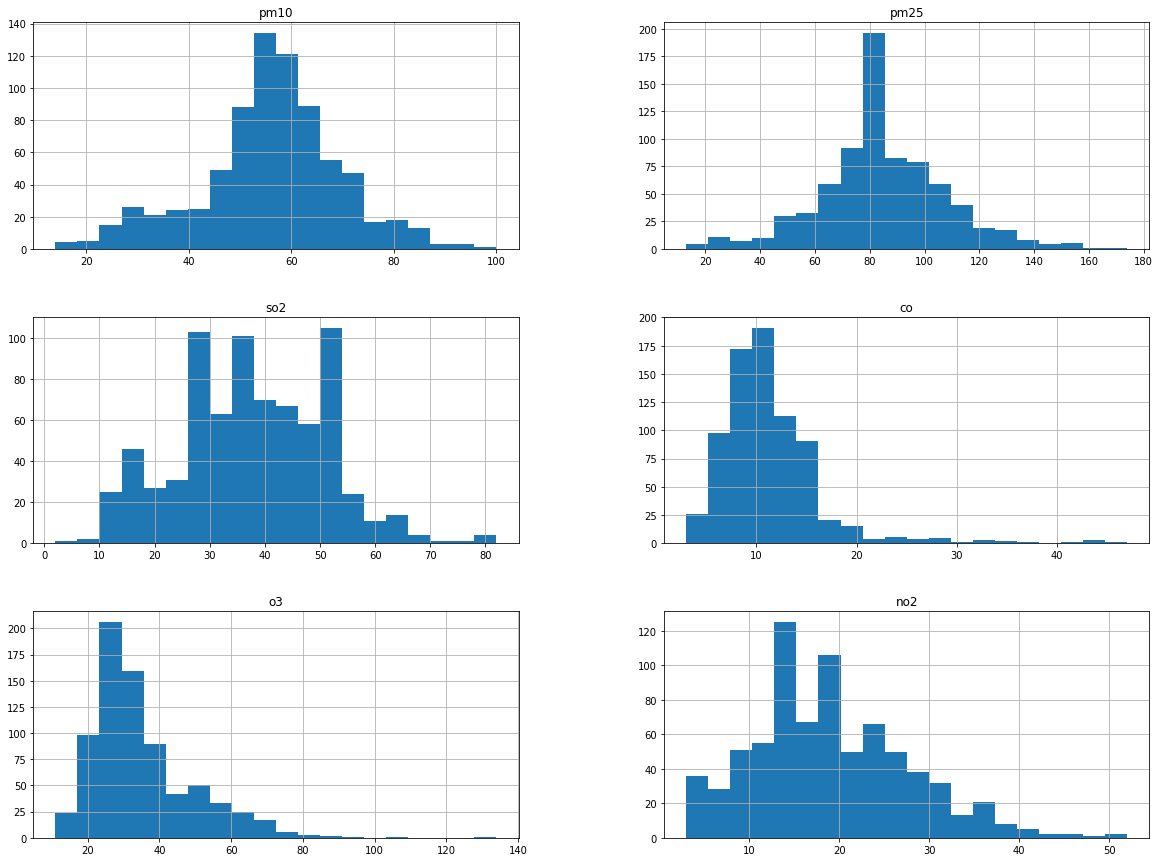

In [ ]:
# search for correlation
df.hist(bins=20, figsize=(20,15))
plt.show()

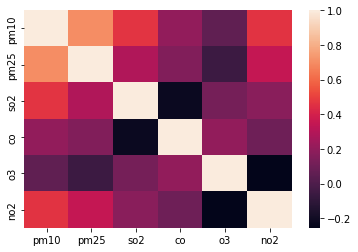

In [ ]:
# search for correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

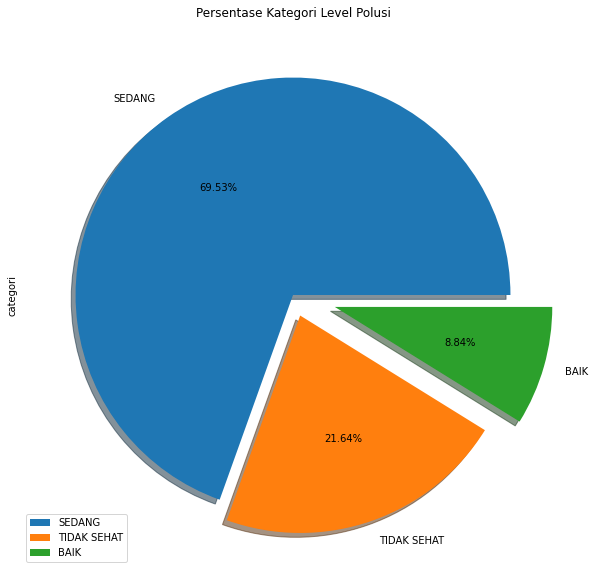

In [ ]:
# visualize the percentage of pollution level categories
plt.figure(figsize=(10,10))
df['categori'].value_counts().plot.pie(shadow=True, explode = [0,0.1, 0.2],autopct='%1.2f%%')
plt.title("Persentase Kategori Level Polusi")
plt.legend()
plt.show()

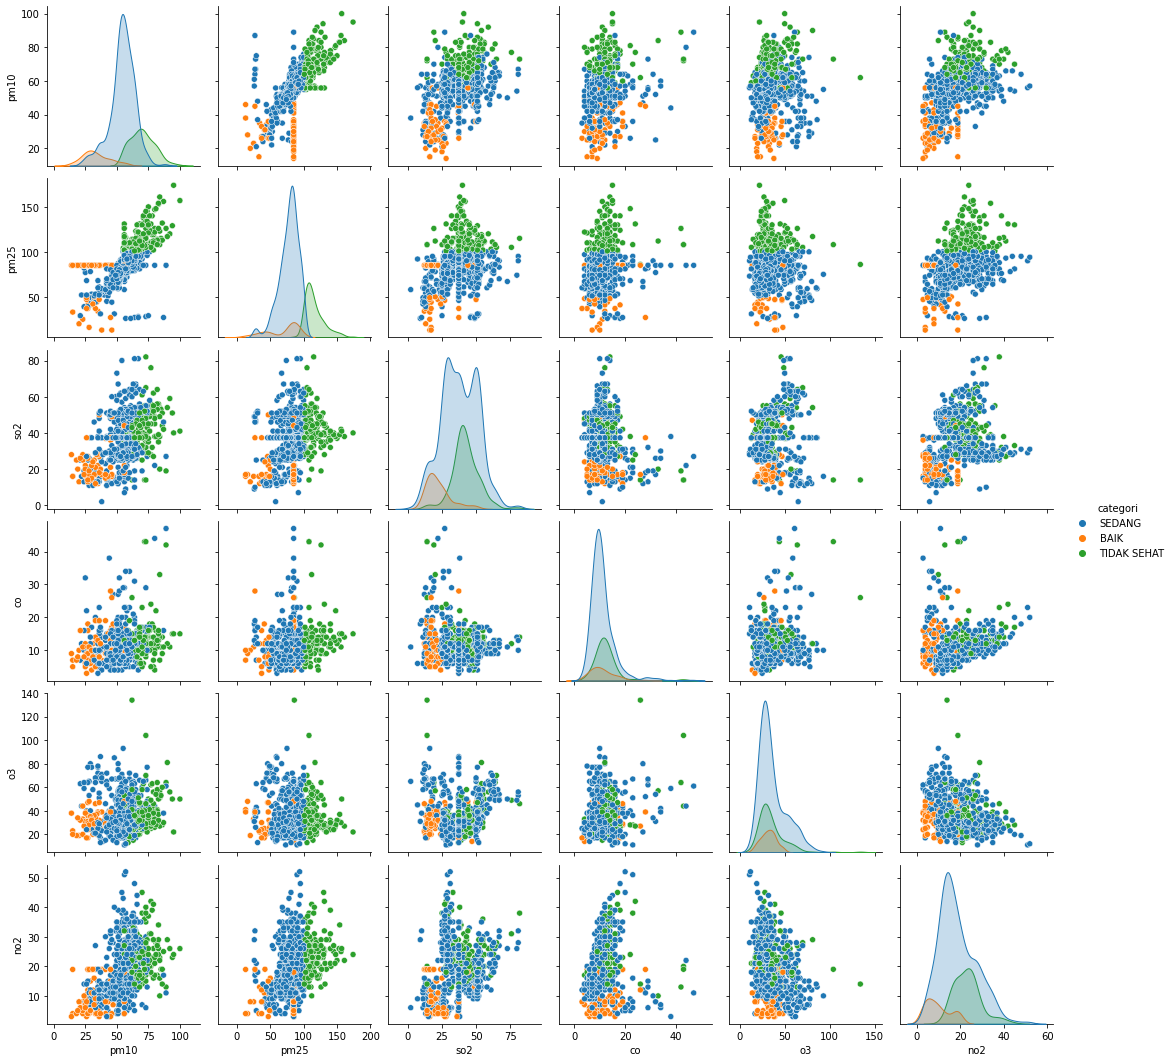

In [ ]:
# visualize pairwise relationships in a dataset
sns.pairplot(df,hue='categori')

In [ ]:
# gets rows (and/or columns) at integer locations
X=df.iloc[:,1:6]
y=df.iloc[:,7]

**Naive Bayes Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification


X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=101)

Making a confusion matrix

In [ ]:
from sklearn.naive_bayes import GaussianNB

#summarizing the performance of a classification algorithm

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm1 = confusion_matrix(y_test, Y_pred)
accuracy1 = accuracy_score(y_test,Y_pred)
precision1 =precision_score(y_test, Y_pred,average='micro')
recall1 = recall_score(y_test, Y_pred,average='micro')
f11 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for Naive Bayes\n',cm1)
print('accuracy_Naive Bayes: %.3f' %accuracy1)
print('precision_Naive Bayes: %.3f' %precision1)
print('recall_Naive Bayes: %.3f' %recall1)
print('f1-score_Naive Bayes : %.3f' %f11)



Confusion matrix for Naive Bayes
 [[  9   5   0]
 [  3 102   4]
 [  0   2  27]]
accuracy_Naive Bayes: 0.908
precision_Naive Bayes: 0.908
recall_Naive Bayes: 0.908
f1-score_Naive Bayes : 0.908


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.predict(X_test)
score.append(knn.score(X_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(X_test,y_test)*100)

y_pred=knn.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
accuracy = accuracy_score(y_true,y_pred)
precision =precision_score(y_true, y_pred,average='micro')
recall = recall_score(y_true, y_pred,average='micro')
f1 = f1_score(y_true,y_pred,average='micro')

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN: %.3f' %accuracy)
print('precision_KNN: %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

KNN accuracy = 94.07894736842105
Confusion matrix for KNN
 [[ 11   3   0]
 [  3 104   2]
 [  0   1  28]]
accuracy_KNN: 0.941
precision_KNN: 0.941
recall_KNN: 0.941
f1-score_KNN : 0.941


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
score.append(svm.score(X_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(X_test,y_test)*100)

y_pred=svm.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
accuracy3 = accuracy_score(y_true,y_pred)
precision3 =precision_score(y_true, y_pred,average='micro')
recall3 = recall_score(y_true, y_pred,average='micro')
f13 = f1_score(y_true,y_pred,average='micro')

print('Confusion matrix for SVM\n',cm)
print('accuracy_SVM: %.3f' %accuracy3)
print('precision_SVM: %.3f' %precision3)
print('recall_SVM: %.3f' %recall3)
print('f1-score_SVM : %.3f' %f13)

svm test accuracy = 96.05263157894737
Confusion matrix for SVM
 [[  8   6   0]
 [  0 109   0]
 [  0   0  29]]
accuracy_SVM: 0.961
precision_SVM: 0.961
recall_SVM: 0.961
f1-score_SVM : 0.961


In [ ]:
print("Perbandingan Akurasi dari 3 Model (Naive Bayes, KNN, SVM)\n")
print('accuracy_Naive Bayes: %.3f' %accuracy1)
print('accuracy_KNN: %.3f' %accuracy)
print('accuracy_SVM: %.3f' %accuracy3)

Perbandingan Akurasi dari 3 Model (Naive Bayes, KNN, SVM)

accuracy_Naive Bayes: 0.908
accuracy_KNN: 0.941
accuracy_SVM: 0.961


In [ ]:
# data = {'Naive Bayes': [accuracy1, precision1, recall1, f11],
#         'KNN' : [accuracy, precision, recall, f1],
#         'SVM': [accuracy3, precision3,recall3,f13]}

# df = pd.DataFrame(data, index=['Akurasi','Presisi','Recall','F!-score'])

# df.head()

,Naive Bayes,KNN,SVM
Akurasi,0.907895,0.940789,0.960526
Presisi,0.907895,0.940789,0.960526
Recall,0.907895,0.940789,0.960526
F!-score,0.907895,0.940789,0.960526


In [ ]:
# calculate the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

        BAIK       0.75      0.64      0.69        14
      SEDANG       0.94      0.94      0.94       109
 TIDAK SEHAT       0.87      0.93      0.90        29

    accuracy                           0.91       152
   macro avg       0.85      0.84      0.84       152
weighted avg       0.91      0.91      0.91       152

